In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
plt.rcParams['figure.figsize'] = (15, 10)

# Read in the baker results as numpy records.
names = 'ug gr ri iz zy sedname redshift time'.split()
lsst = np.recfromtxt('../results/lsst_bakeoff_output.txt', names=names)
photozdc1 = np.recfromtxt('../results/photozdc1_bakeoff_output.txt', names=names)
galsim = np.recfromtxt('../results/galsim_bakeoff_output.txt', names=names)

In [2]:
# Check that the sednames match (unmangling for the PhotoZDC1 names).
for i in range(len(lsst['sedname'])):
    if lsst['sedname'][i] != photozdc1['sedname'][i].replace('_', '.'):
        print "photozdc1 name mismatch:", lsst['sedname'][i], photozdc1['sedname'][i]
    if lsst['sedname'][i] != galsim['sedname'][i]:
        print "galsim name mismatch:", lsst['sedname'][i], galsim['sedname'][i]

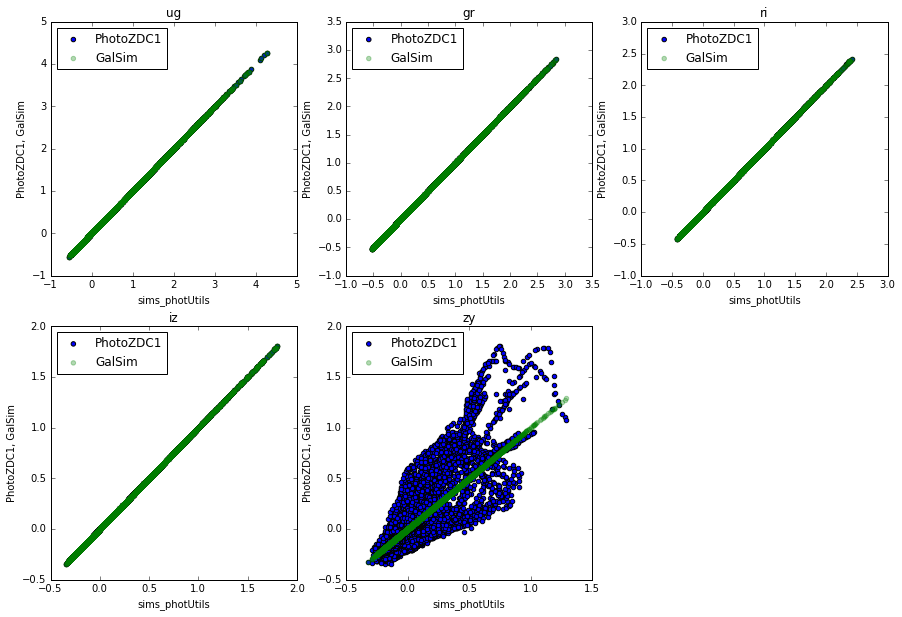

In [3]:
# Plot photozdc1 vs lsst and galsim vs lsst.
fig = plt.figure()
subplots = [231, 232, 233, 234, 235]
for color, subplot in zip(names[:5], subplots):
    axes = fig.add_subplot(subplot)
    handles = []
    handles.append(plt.scatter(lsst[color], photozdc1[color], label='PhotoZDC1'))
    handles.append(plt.scatter(lsst[color], galsim[color], alpha=0.3, color='green', marker='o', label='GalSim'))
    plt.legend(handles=handles, scatterpoints=1, loc=2)
    plt.xlabel('sims_photUtils')
    plt.ylabel('PhotoZDC1, GalSim')
    axes.set_title(color)

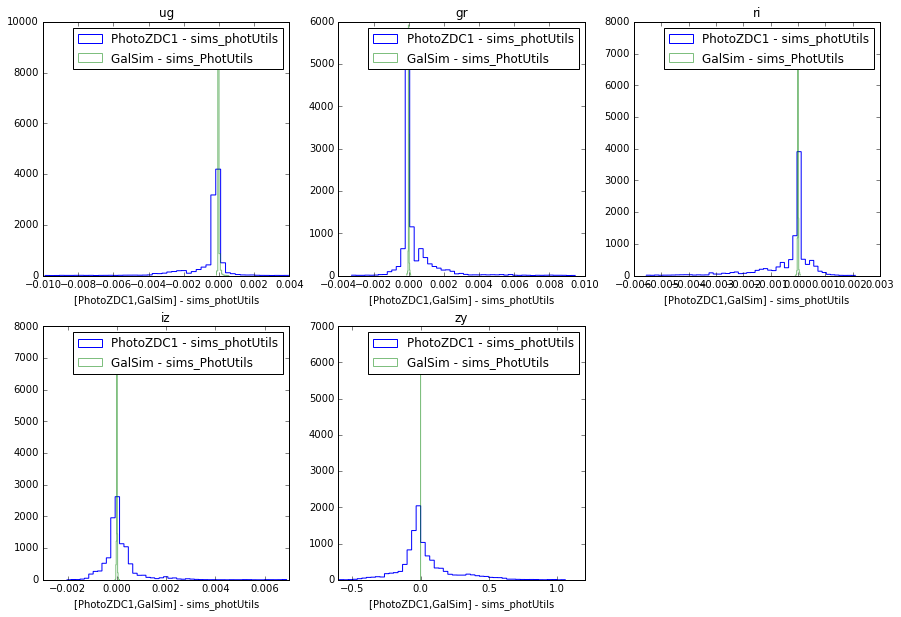

In [4]:
# Plot histograms of photozdc1[color]-lsst[color] and galsim[color]-lsst[color].
fig = plt.figure()
for color, subplot in zip(names[:5], subplots):
    axes = fig.add_subplot(subplot)
    plt.hist(photozdc1[color] - lsst[color], label='PhotoZDC1 - sims_photUtils', histtype='step', bins=50)
    plt.hist(galsim[color] - lsst[color], alpha=0.5, color='green', label='GalSim - sims_PhotUtils', histtype='step')
    plt.legend()
    plt.xlabel('[PhotoZDC1,GalSim] - sims_photUtils')
    axes.set_title(color)

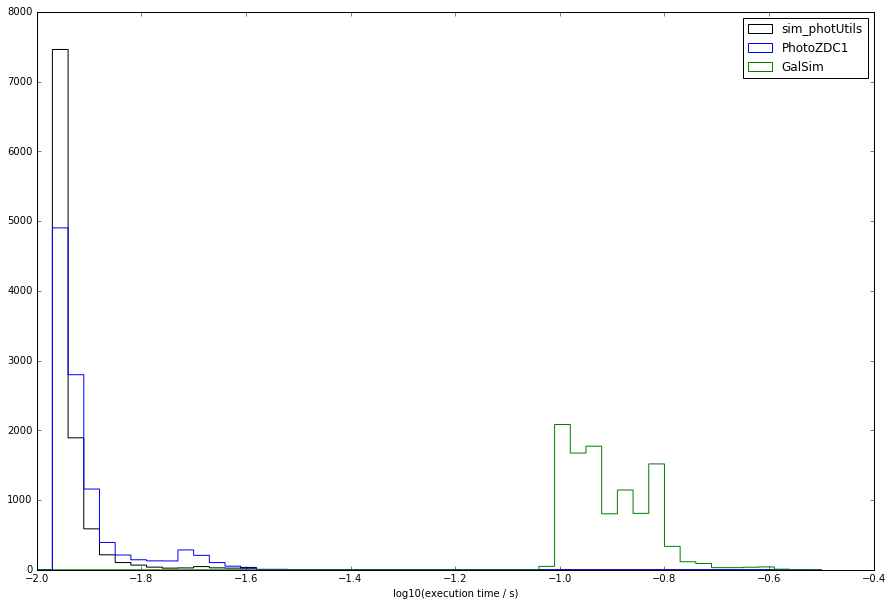

In [5]:
# Histogram the execution times.
fig = plt.figure()
plt.hist(np.log10(lsst['time']), histtype='step', color='black', range=(-2, -0.5), bins=50, label='sim_photUtils')
plt.hist(np.log10(photozdc1['time']), histtype='step', color='blue', range=(-2, -0.5), bins=50, label='PhotoZDC1')
plt.hist(np.log10(galsim['time']), histtype='step', color='green', range=(-2, -0.5), bins=50, label='GalSim')
plt.legend()
plt.xlabel('log10(execution time / s)')